<a href="https://colab.research.google.com/github/IagoAlmeida-ias/Python-para-Data-Science/blob/main/Desafio03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pacotes de Manipulação de Dados

import numpy as np
import pandas as pd

# Pacotes Gráficos

import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de Modelagem

import statsmodels.api as sm

In [ ]:
# Import de base dados

df = pd.read_csv('Base_Notas_v3.csv', index_col='id')

In [ ]:
df

,horas_estudo,aulas_participadas,sono_medio,nota_exame,intercepto
id,,,,,
0,5.993428,8,7.343618,76.119754,1
1,4.723471,11,5.236960,60.929961,1
2,6.295377,12,7.324084,81.731317,1
3,8.046060,7,6.614918,82.699637,1
4,4.531693,5,6.323078,70.662399,1
5,4.531726,8,7.611676,67.758906,1
6,8.158426,6,8.031000,78.653234,1
7,6.534869,12,7.931280,82.493253,1
8,4.061051,8,6.160782,70.142780,1


In [ ]:
df.head()

,horas_estudo,aulas_participadas,sono_medio,nota_exame
id,,,,
0,5.993428,8,7.343618,76.119754
1,4.723471,11,5.236960,60.929961
2,6.295377,12,7.324084,81.731317
3,8.046060,7,6.614918,82.699637
4,4.531693,5,6.323078,70.662399


In [ ]:
df.tail()

,horas_estudo,aulas_participadas,sono_medio,nota_exame
id,,,,
25,5.221845,6,8.564644,68.005282
26,2.698013,9,4.380255,57.246133
27,5.751396,12,7.821903,83.669643
28,3.798723,14,7.087047,84.799914
29,4.416613,13,6.700993,76.441324


In [ ]:
df.shape

(30, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   horas_estudo        30 non-null     float64
 1   aulas_participadas  30 non-null     int64  
 2   sono_medio          30 non-null     float64
 3   nota_exame          30 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.2 KB


In [ ]:
df.isnull().sum()

,0
horas_estudo,0
aulas_participadas,0
sono_medio,0
nota_exame,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().round()

,horas_estudo,aulas_participadas,sono_medio,nota_exame
count,30.0,30.0,30.0,30.0
mean,5.0,10.0,7.0,72.0
std,2.0,3.0,1.0,9.0
min,1.0,5.0,4.0,54.0
25%,4.0,8.0,7.0,66.0
50%,5.0,10.0,7.0,71.0
75%,6.0,12.0,8.0,78.0
max,8.0,14.0,9.0,89.0


# Complementando - Análise Exploratória dos Dados

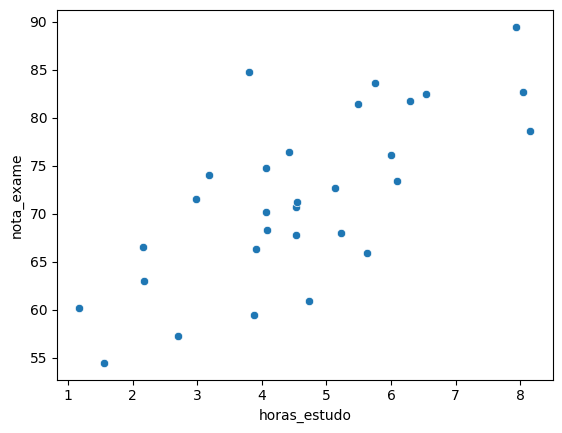

In [ ]:
# Gráfico de Dispersão por Horas de estudo

sns.scatterplot(x=df['horas_estudo'],
                y=df['nota_exame']);

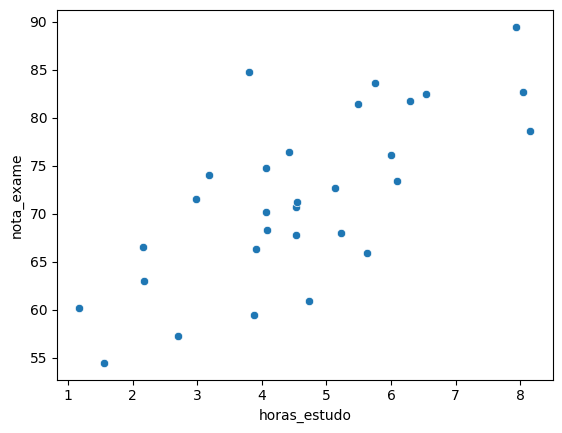

In [ ]:
# Gráfico de Dispersão por Aulas_part

sns.scatterplot(x=df['horas_estudo'],
                y=df['nota_exame']);

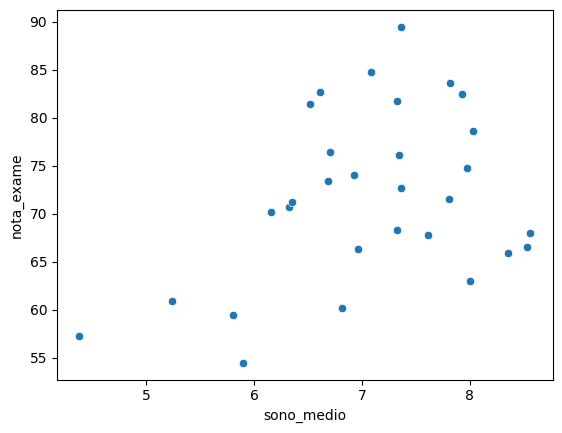

In [ ]:
# Gráfico de Dispersão por sono medio

sns.scatterplot(x=df['sono_medio'],
                y=df['nota_exame']);

In [ ]:
# Correlação linear Persen

df.corr()

,horas_estudo,aulas_participadas,sono_medio,nota_exame
horas_estudo,1.000000,-0.136144,0.215949,0.721178
aulas_participadas,-0.136144,1.000000,0.037439,0.385559
sono_medio,0.215949,0.037439,1.000000,0.370024
nota_exame,0.721178,0.385559,0.370024,1.000000


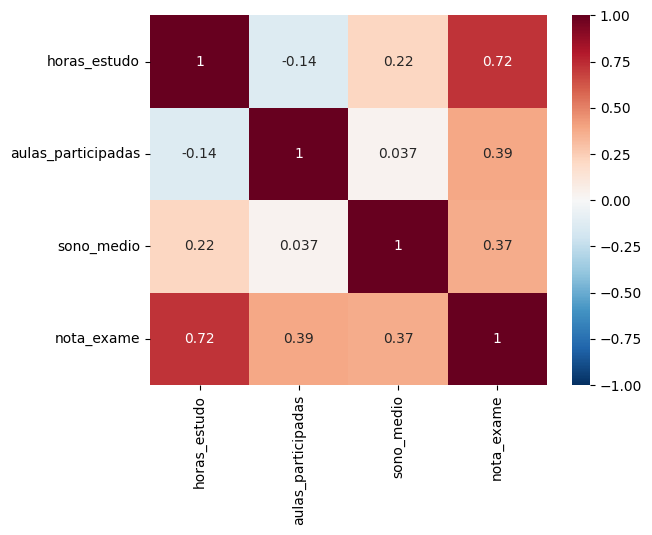

In [ ]:
# Grafico HeatMap

sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1);

In [ ]:
# Variável resposta

y = df['nota_exame']

# Variável explicativas

df['intercepto'] = 1
x = df[ ['intercepto', 'horas_estudo', 'aulas_participadas', 'sono_medio'] ]

In [ ]:
# Ajuste do Modelo

modelo = sm.OLS(y,x)
res = modelo.fit()

In [ ]:
# Resultado ajuste do modelo

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_exame   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     33.24
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           4.76e-09
Time:                        19:48:35   Log-Likelihood:                -83.926
No. Observations:                  30   AIC:                             175.9
Df Residuals:                      26   BIC:                             181.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto            27.9742      6

In [ ]:
# Variável resposta

y = df['nota_exame']

# Variável explicativa

df['intercepto'] = 1
x = df[ ['intercepto', 'horas_estudo', 'sono_medio'] ]

In [ ]:
# Ajuste do Modelo

modelo = sm.OLS(y,x)
res = modelo.fit()

In [ ]:
# Resultado do ajuste do modelo

print(res.summary())

# Não foi bom utilizar o Tratamento de Outliers

--- Resumo do Modelo de Regressão Original ---
                            OLS Regression Results                            
Dep. Variable:             nota_exame   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     33.24
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           4.76e-09
Time:                        20:18:27   Log-Likelihood:                -83.926
No. Observations:                  30   AIC:                             175.9
Df Residuals:                      26   BIC:                             181.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

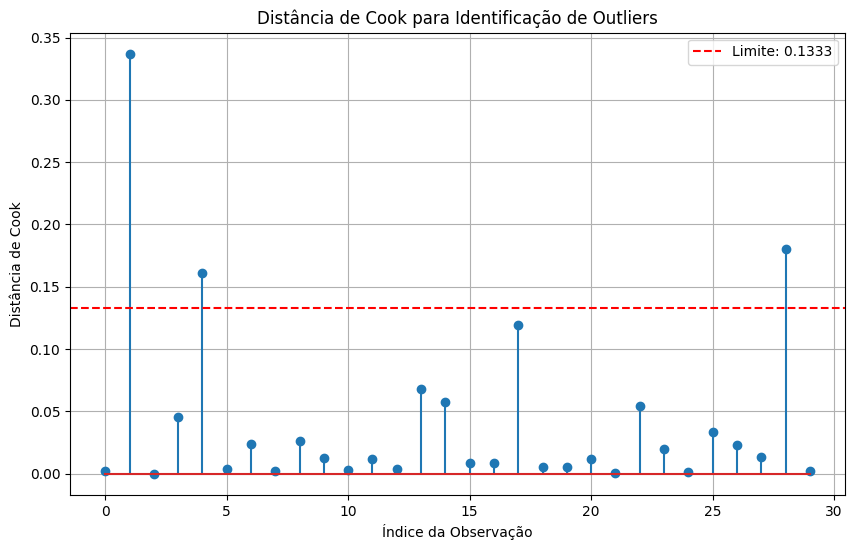

--- Resumo do Modelo de Regressão Após Remoção de Outliers ---
                            OLS Regression Results                            
Dep. Variable:             nota_exame   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     64.77
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           2.28e-11
Time:                        20:18:27   Log-Likelihood:                -66.091
No. Observations:                  27   AIC:                             140.2
Df Residuals:                      23   BIC:                             145.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [ ]:
# Tratamento de Outliers
# Defina a variável dependente (y) e as independentes (X)
y = df['nota_exame']
X = df[['intercepto','sono_medio', 'horas_estudo', 'aulas_participadas']]

# Adicione uma constante para o intercepto do modelo (statsmodels requer isso)
X = sm.add_constant(X)

# --- 2. Ajustar o Modelo Original ---
model_original = sm.OLS(y, X)
results_original = model_original.fit()

print("--- Resumo do Modelo de Regressão Original ---")
print(results_original.summary())
print("\n" + "="*80 + "\n")

# --- 3. Identificar Outliers pela Distância de Cook ---
influence = results_original.get_influence()
cooks_distance = influence.cooks_distance[0]
df['Cooks_Distance'] = cooks_distance

# Regra prática para Distância de Cook: 4/n (onde n é o número de observações)
# Alguns também usam 1.0 como limite, dependendo da severidade
threshold_cooks = 4 / len(df)
# ou um limite mais rigoroso: threshold_cooks = 1.0

# Identificar os índices dos outliers
outlier_indices = df[df['Cooks_Distance'] > threshold_cooks].index

print(f"--- Outliers Identificados pela Distância de Cook (Limite > {threshold_cooks:.4f}) ---")
print(df.loc[outlier_indices])
print(f"\nTotal de outliers identificados: {len(outlier_indices)}")
print("\n" + "="*80 + "\n")

# Plotar Distância de Cook para visualização
plt.figure(figsize=(10, 6))
plt.stem(df.index, cooks_distance, markerfmt='o')
plt.axhline(y=threshold_cooks, color='r', linestyle='--', label=f'Limite: {threshold_cooks:.4f}')
plt.title("Distância de Cook para Identificação de Outliers")
plt.xlabel("Índice da Observação")
plt.ylabel("Distância de Cook")
plt.legend()
plt.grid(True)
plt.show() # Mostra o gráfico


# --- 4. Remover Outliers e Reajustar o Modelo ---
df_cleaned = df.drop(outlier_indices).copy()

y_cleaned = df_cleaned['nota_exame']
X_cleaned = df_cleaned[['intercepto', 'horas_estudo', 'aulas_participadas', 'sono_medio']]
X_cleaned = sm.add_constant(X_cleaned) # Adicionar a constante novamente

model_cleaned = sm.OLS(y_cleaned, X_cleaned)
results_cleaned = model_cleaned.fit()

print("--- Resumo do Modelo de Regressão Após Remoção de Outliers ---")
print(results_cleaned.summary())
print("\n" + "="*80 + "\n")